**EXPLORATORY DATA ANALYSIS**

In [7]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Importing the dataset
data = pd.read_csv('employees_data.csv', index_col=0)
# Displaying the first two rows of the dataset
data.head(2)

# Displaying information about the dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        6 non-null      object 
 1   age         6 non-null      int64  
 2   height      6 non-null      float64
 3   gender      6 non-null      object 
 4   city        6 non-null      object 
 5   salary      6 non-null      int64  
 6   department  6 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 384.0+ bytes


,age,height,salary
count,6.000000,6.000000,6.000000
mean,35.166667,5.833333,7500.000000
std,6.675827,0.216025,1870.828693
min,25.000000,5.500000,5000.000000
25%,31.250000,5.725000,6250.000000
50%,36.500000,5.850000,7500.000000
75%,39.500000,5.975000,8750.000000
max,43.000000,6.100000,10000.000000


In [9]:
# Compter le nombre de sexes différents
# data.value_counts('gender')
data['gender'].value_counts()

gender
M    4
F    2
Name: count, dtype: int64

**VALIDATE DATA**

In [10]:
data.select_dtypes('number')
# data['height'].astype('int64')
# data.describe()
# data.dtypes

,age,height,salary
0,25,5.5,5000
1,35,6.0,6000
2,30,5.8,7000
3,40,5.9,8000
4,38,5.7,9000
5,43,6.1,10000


In [11]:
data.isna().any()

data.columns[~data.isna().any()].tolist()

['name', 'age', 'height', 'gender', 'city', 'salary', 'department']

In [12]:
data['department'].nunique()

6

In [13]:
from scipy.stats import iqr

# Calculating the IQR for the 'height' column
height_iqr = iqr(data['height'])
print(f"IQR for height: {height_iqr}")

IQR for height: 0.25


In [14]:
data.corr(numeric_only=True)

,age,height,salary
age,1.000000,0.771999,0.872745
height,0.771999,1.000000,0.544359
salary,0.872745,0.544359,1.000000


<Axes: >

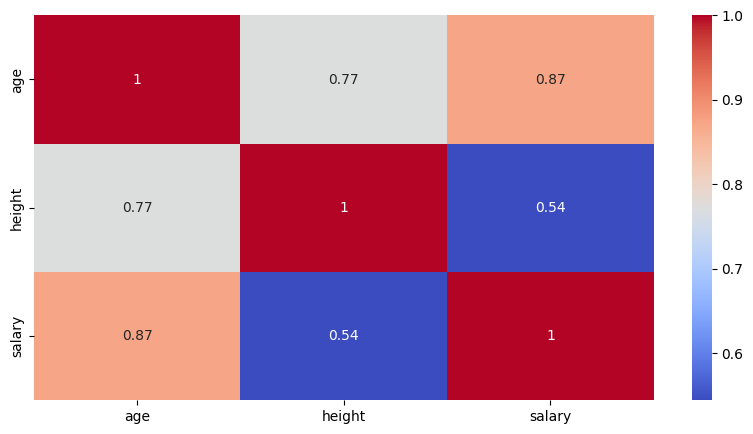

In [15]:
#Correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

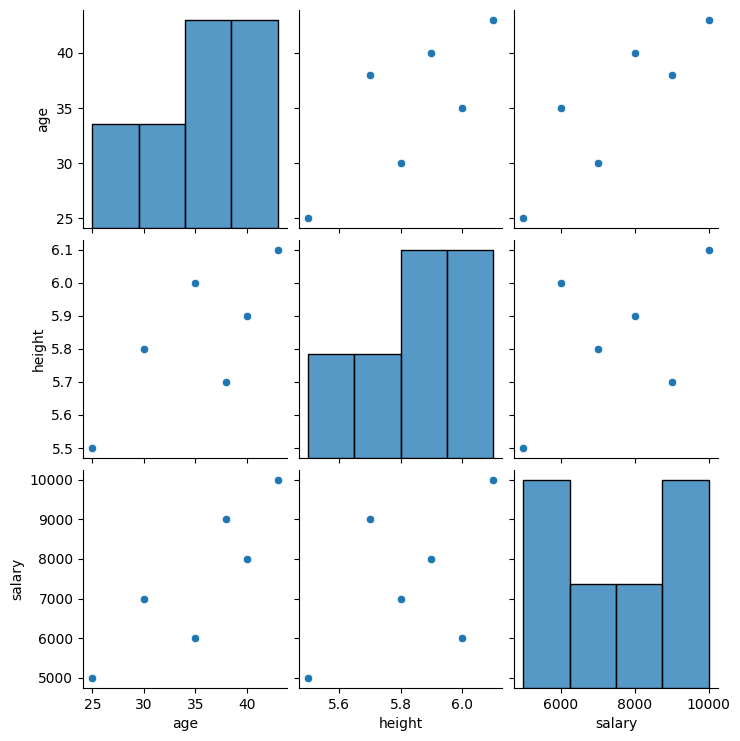

In [16]:
# PAIRPLOT
sns.pairplot(data= data)

In [17]:
pd.cut(data['salary'], bins=5).value_counts().sort_index()

salary
(4995.0, 6000.0]     2
(6000.0, 7000.0]     1
(7000.0, 8000.0]     1
(8000.0, 9000.0]     1
(9000.0, 10000.0]    1
Name: count, dtype: int64